In [14]:
import sys
sys.path.append("../")

In [15]:
import glob
import torch
import matplotlib.pyplot as plt
import yaml
import argparse
from utils import yaml_parser
from model_wrapper.cnn_wrapper import CNNWrapper
import json
import torch
from model_wrapper import model_dict
import random
import numpy as np

In [16]:
from model_wrapper.backbones.model_nds.pycls.models.nas.fbnas import NDS

In [17]:
a = list(np.arange(len(config.backbone_config.NDS )))

In [18]:
random.shuffle(a)

In [19]:
with open('../configs/nds_resnet_siam_mse_benchmark_12e-1.yaml', 'r') as f:
    config = yaml_parser(yaml.unsafe_load(f))

In [20]:
for search_space in ['DARTS','DARTS_in','DARTS_fix-w-d','DARTS_fix-w-d_in',\
                                     'ENAS','ENAS_in','ENAS_fix-w-d',\
                                     'PNAS','PNAS_in','PNAS_fix-w-d',\
                                     'Amoeba','Amoeba_in',\
                                     'NASNet','NASNet_in', \
                                        'ResNet','ResNeXt-A','ResNeXt-A_in','ResNeXt-B','ResNeXt-B_in']:
    config.backbone_config.search_space = search_space
    config.backbone_config.NDS = NDS(config.backbone_config.search_space,'../data/download_data/nds_data/')
    config.backbone_config.arch = random.choice(list(np.arange(len(config.backbone_config.NDS ))))
    model = CNNWrapper(config.backbone_config, config.head_config)#model_dict.BACKBONE_CONFIGS[config.backbone_config.model](config.backbone_config)
    assert model(torch.rand(3,3,32,32)).size(-1) == 8

KeyboardInterrupt: 

In [21]:
model(torch.rand(3,3,32,32)).size()

torch.Size([3, 512, 8, 8])

In [18]:
model = model_dict.BACKBONE_CONFIGS[config.backbone_config.model](config.backbone_config)

In [19]:
model(torch.rand(3,3,32,32)).shape

torch.Size([3, 32, 8, 8])

In [11]:
import math
def positionalencoding2d(d_model, height, width):
    """
    :param d_model: dimension of the model
    :param height: height of the positions
    :param width: width of the positions
    :return: d_model*height*width position matrix
    """
    if d_model % 4 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dimension (got dim={:d})".format(d_model))
    pe = torch.zeros(d_model, height, width)
    # Each dimension use half of d_model
    d_model = int(d_model / 2)
    div_term = torch.exp(torch.arange(0., d_model, 2) *
                         -(math.log(10000.0) / d_model))
    pos_w = torch.arange(0., width).unsqueeze(1)
    pos_h = torch.arange(0., height).unsqueeze(1)
    pe[0:d_model:2, :, :] = torch.sin(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[1:d_model:2, :, :] = torch.cos(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[d_model::2, :, :] = torch.sin(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    pe[d_model + 1::2, :, :] = torch.cos(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    return pe


In [15]:
feature = positionalencoding2d(256,8,8)

In [41]:
a = torch.load('../data/dataset/output.pth', map_location='cpu')

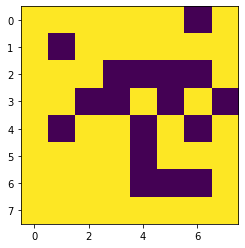

In [44]:
plt.imshow(a[-1,-2])

In [43]:
f'{0.002}'

'0.002'

In [3]:
glob.glob('../model_wrapper/**/*.py', recursive=True)

['../model_wrapper/cnn_wrapper.py',
 '../model_wrapper/model_dict.py',
 '../model_wrapper/heads/head_nb101.py',
 '../model_wrapper/backbones/backbone_nb101.py',
 '../model_wrapper/backbones/model_nb101/model_nb101.py',
 '../model_wrapper/backbones/model_nb101/base_ops.py',
 '../model_wrapper/backbones/model_nb101/graph_util.py',
 '../model_wrapper/backbones/model_nb101/model_spec.py',
 '../model_wrapper/generators/simple_generator.py']

In [5]:
with open('../data/nb101/nasbench1_2500.json','r') as t:
    archs_accs = json.load(t)

In [6]:
arch, acc = archs_accs[0]

In [7]:
with open('../configs/nb101_simple.yaml', 'r') as f:
    config = yaml_parser(yaml.unsafe_load(f))



In [14]:
(config.optim_g_config.weight_decay)

4e-05

In [9]:
config.backbone_config.arch = arch

In [10]:
backbone_config = config.backbone_config
head_config = config.head_config
model = CNNWrapper(backbone_config, head_config)

In [21]:
torch.max(torch.rand(10,2),1)

torch.return_types.max(
values=tensor([0.4871, 0.3014, 0.3138, 0.3526, 0.7189, 0.2491, 0.8333, 0.3806, 0.7044,
        0.8462]),
indices=tensor([0, 1, 0, 0, 0, 1, 0, 0, 1, 1]))

In [10]:
a = torch.rand(32,3,32,32)

In [11]:
model(a).shape

torch.Size([32, 2, 64, 8, 8])

In [10]:
config.head_config.out_channel

128